<a href="https://colab.research.google.com/github/isil-ada/Classification-With-DesicionTree/blob/main/DesicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **(1) Examining the data set**

In [34]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [35]:
df = df.drop(columns=['ID'])
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [37]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# **(2) Training the model**

In [38]:
X = df.drop(columns=['Personal Loan']) # features
y = df['Personal Loan'] # target

In [39]:
# train - test - split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# **(3) Evaluation of results: test**

In [41]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.985


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[889   6]
 [  9  96]]


In [43]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.91      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



# **(4) Hyperparameter tuning**

In [44]:
# Define the parameter combinations we want to test
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # None means unlimited depth
    'min_samples_split': [2, 10, 20, 50], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10, 20], # Minimum number of samples required in a leaf node
    'criterion': ['gini', 'entropy'] # Metric to measure the quality of a split
}

In [45]:
# Create the GridSearchCV object
# cv=5 means we will perform 5-fold cross validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='accuracy',  # The metric we will use for evaluation
    n_jobs=-1,  # Use all processor cores
    verbose=1  # Show progress information
)

In [46]:
# Perform the search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [47]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best cross-validation score: 0.98275


In [48]:
# Get the best model and evaluate it on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Test accuracy (tuned model): {accuracy_tuned}")

Test accuracy (tuned model): 0.985


In [49]:
# First, let's train the original model (without any constraints)
original_model = DecisionTreeClassifier(random_state=42)
original_model.fit(X_train, y_train)

# Calculate both training and test accuracies for the original model
original_train_accuracy = original_model.score(X_train, y_train)
original_test_accuracy = original_model.score(X_test, y_test)

In [50]:
# Now let's look at the tuned model's training accuracy
tuned_train_accuracy = best_model.score(X_train, y_train)
tuned_test_accuracy = accuracy_tuned  # This is the value you already calculated

# Let's also check the tree depths
original_depth = original_model.get_depth()
tuned_depth = best_model.get_depth()

In [51]:
# Print a comprehensive comparison
print("=" * 70)
print("DETAILED COMPARISON: ORIGINAL vs TUNED MODEL")
print("=" * 70)
print(f"\nORIGINAL MODEL (No constraints):")
print(f"  - Tree depth: {original_depth}")
print(f"  - Training accuracy: {original_train_accuracy:.4f}")
print(f"  - Test accuracy: {original_test_accuracy:.4f}")
print(f"  - Difference (Train - Test): {(original_train_accuracy - original_test_accuracy):.4f}")

print(f"\nTUNED MODEL (With optimal parameters):")
print(f"  - Tree depth: {tuned_depth}")
print(f"  - Best parameters: {grid_search.best_params_}")
print(f"  - Training accuracy: {tuned_train_accuracy:.4f}")
print(f"  - Test accuracy: {tuned_test_accuracy:.4f}")
print(f"  - Difference (Train - Test): {(tuned_train_accuracy - tuned_test_accuracy):.4f}")

print(f"\nANALYSIS:")
print(f"  - The original model had a train-test gap of {(original_train_accuracy - original_test_accuracy):.4f}")
print(f"  - The tuned model has a train-test gap of {(tuned_train_accuracy - tuned_test_accuracy):.4f}")

if (original_train_accuracy - original_test_accuracy) > (tuned_train_accuracy - tuned_test_accuracy):
    print(f"  ✓ The tuned model shows BETTER generalization (smaller gap)")
    print(f"    This means it's less likely to be overfitting!")
else:
    print(f"  ✗ Need to investigate further")

DETAILED COMPARISON: ORIGINAL vs TUNED MODEL

ORIGINAL MODEL (No constraints):
  - Tree depth: 13
  - Training accuracy: 1.0000
  - Test accuracy: 0.9860
  - Difference (Train - Test): 0.0140

TUNED MODEL (With optimal parameters):
  - Tree depth: 5
  - Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
  - Training accuracy: 0.9835
  - Test accuracy: 0.9850
  - Difference (Train - Test): -0.0015

ANALYSIS:
  - The original model had a train-test gap of 0.0140
  - The tuned model has a train-test gap of -0.0015
  ✓ The tuned model shows BETTER generalization (smaller gap)
    This means it's less likely to be overfitting!


------------------------------------------------------------
VISUALIZATION 1: Decision Tree Structure Comparison
------------------------------------------------------------
------------------------------------------------------------


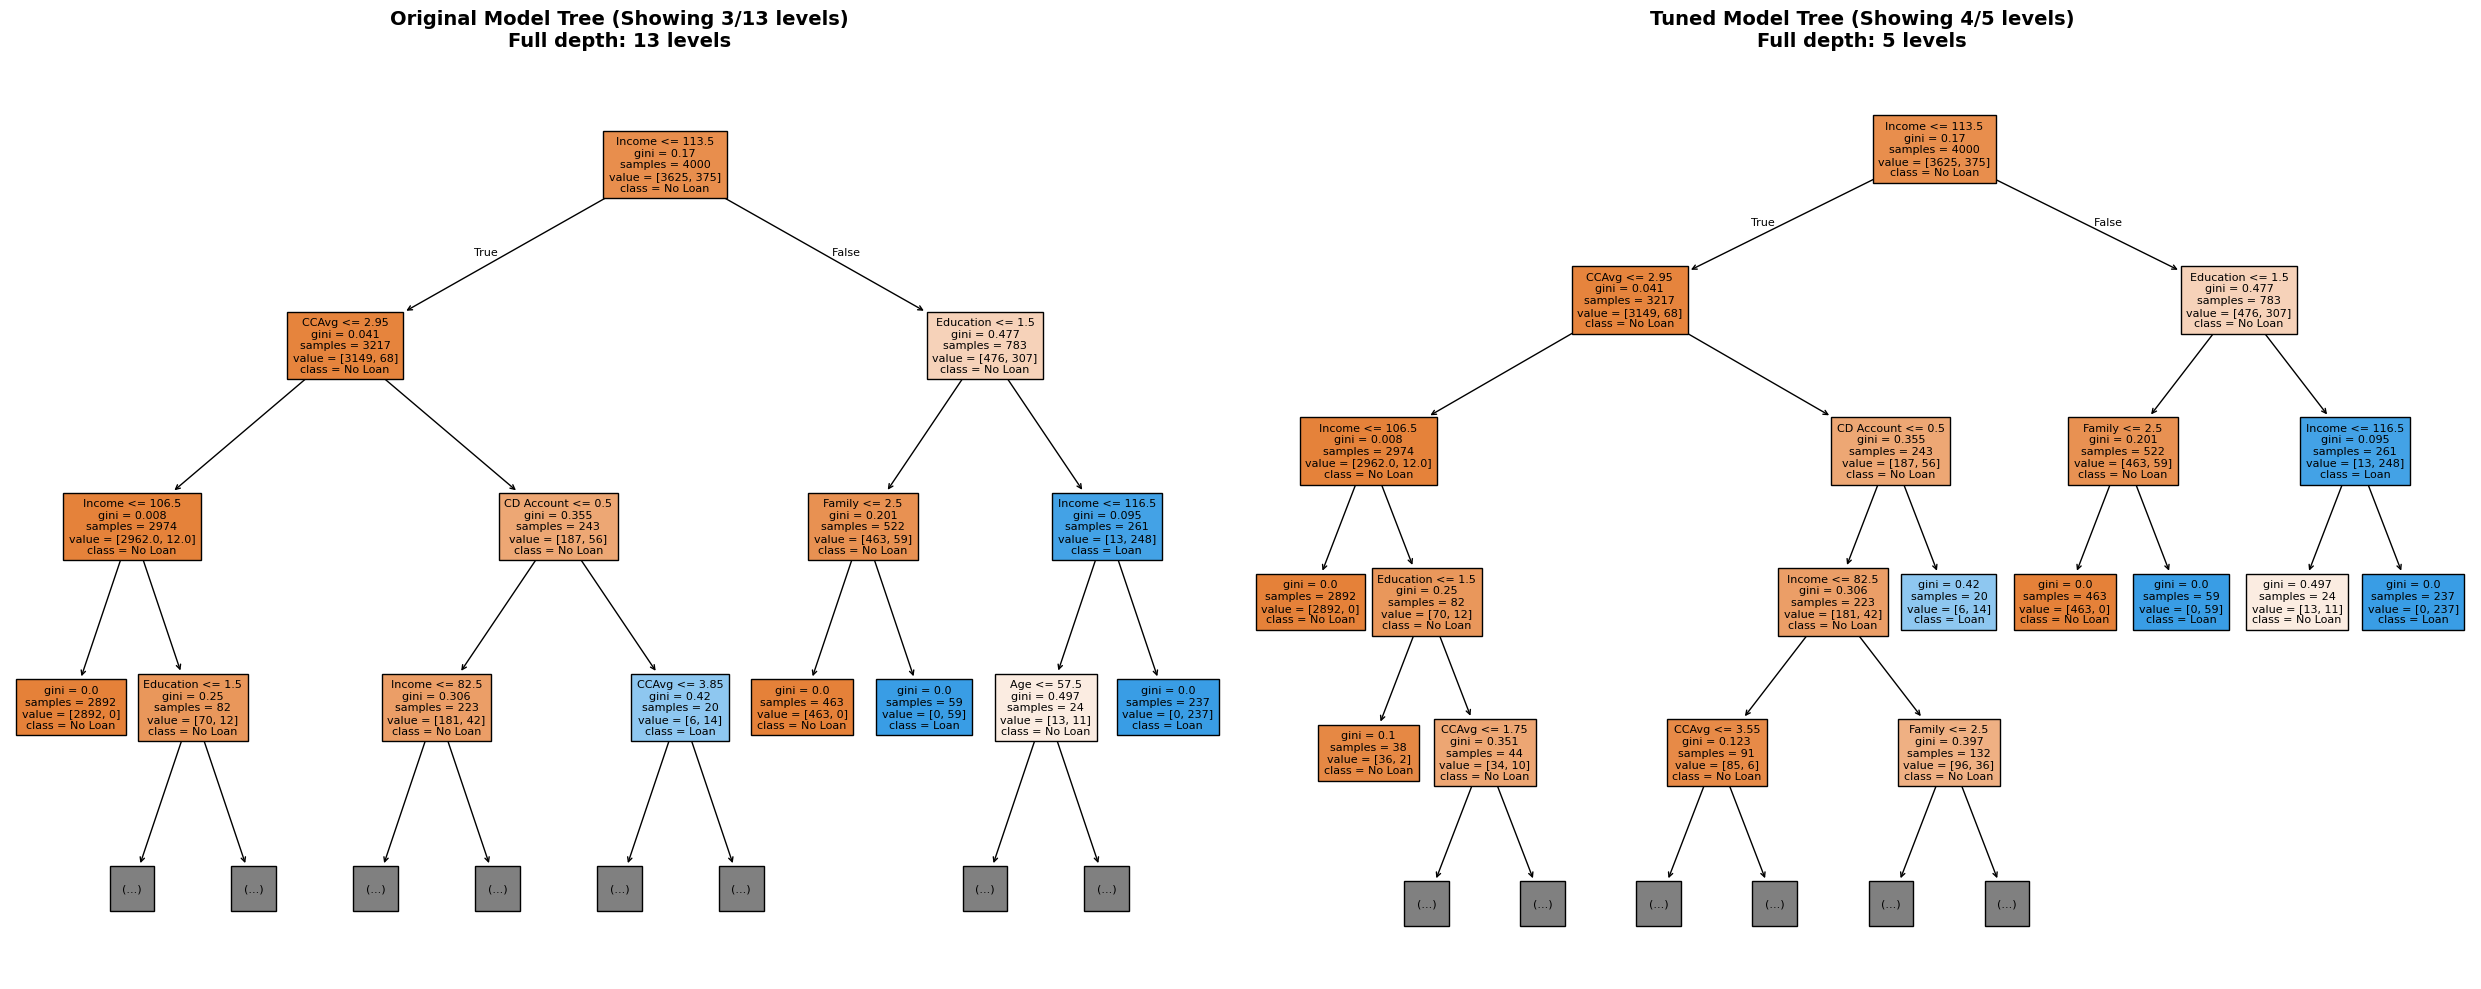

Tree visualization complete!
Orange nodes predict 'No Loan', Blue nodes predict 'Loan'
Darker colors indicate higher confidence in the prediction


In [52]:
# Create figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Original tree (left side)
plot_tree(original_model,
          max_depth=3,
          feature_names=X.columns,
          class_names=['No Loan', 'Loan'],
          filled=True,
          ax=axes[0],
          fontsize=8)
axes[0].set_title(f'Original Model Tree (Showing 3/{original_depth} levels)\nFull depth: {original_depth} levels',
                  fontsize=14, fontweight='bold', pad=20)

# Tuned tree (right side)
plot_tree(best_model,
          max_depth=4,
          feature_names=X.columns,
          class_names=['No Loan', 'Loan'],
          filled=True,
          ax=axes[1],
          fontsize=8)
axes[1].set_title(f'Tuned Model Tree (Showing 4/{tuned_depth} levels)\nFull depth: {tuned_depth} levels',
                  fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('decision_trees_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Tree visualization complete!")
print("Orange nodes predict 'No Loan', Blue nodes predict 'Loan'")
print("Darker colors indicate higher confidence in the prediction")

------------------------------------------------------------
VISUALIZATION 2: Comparison of Training and Test Accuracy
------------------------------------------------------------
------------------------------------------------------------

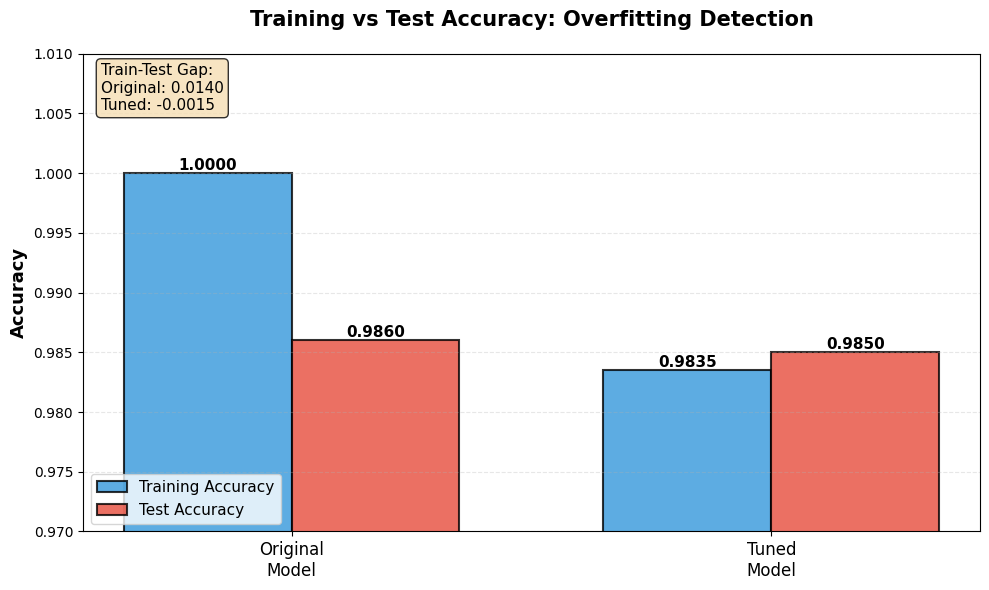

Accuracy comparison complete!
Smaller gap between blue and red bars means better generalization


In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Original\nModel', 'Tuned\nModel']
train_accs = [original_train_accuracy, tuned_train_accuracy]
test_accs = [original_test_accuracy, tuned_test_accuracy]

x = np.arange(len(models))
width = 0.35

# Create grouped bar chart
bars1 = ax.bar(x - width/2, train_accs, width, label='Training Accuracy',
               color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy',
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Accuracy', fontsize=13, fontweight='bold')
ax.set_title('Training vs Test Accuracy: Overfitting Detection',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=11, loc='lower left')
ax.set_ylim([0.97, 1.01])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add train-test gap information
gap_text = f'Train-Test Gap:\nOriginal: {(original_train_accuracy - original_test_accuracy):.4f}\nTuned: {(tuned_train_accuracy - tuned_test_accuracy):.4f}'
ax.text(0.02, 0.98, gap_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Accuracy comparison complete!")
print("Smaller gap between blue and red bars means better generalization")

------------------------------------------------------------
VISUALIZATION 3: Confusion Matrix
------------------------------------------------------------
------------------------------------------------------------


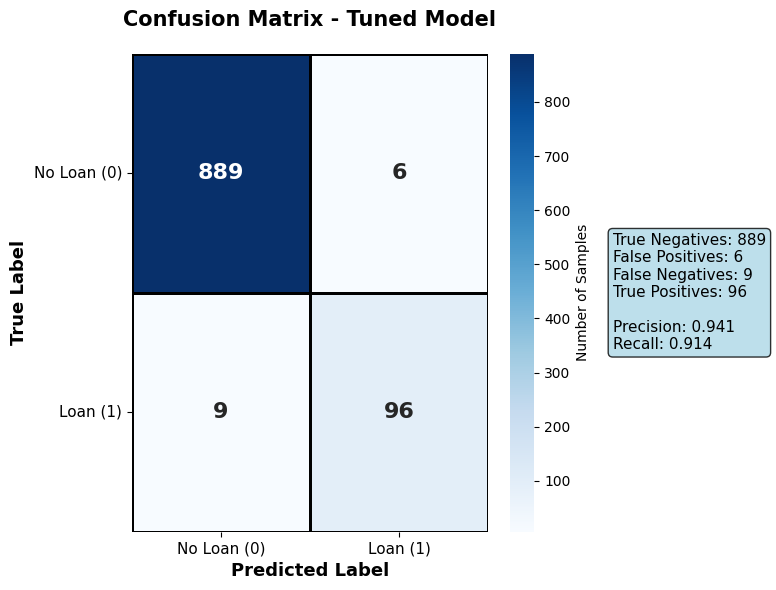

Confusion matrix complete!
Model correctly predicted 985 out of 1000 samples


In [54]:
fig, ax = plt.subplots(figsize=(8, 6))

cm = confusion_matrix(y_test, y_pred_tuned)

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Number of Samples'},
            linewidths=2, linecolor='black',
            ax=ax, annot_kws={'size': 16, 'weight': 'bold'})

ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax.set_title('Confusion Matrix - Tuned Model', fontsize=15, fontweight='bold', pad=20)
ax.set_xticklabels(['No Loan (0)', 'Loan (1)'], fontsize=11)
ax.set_yticklabels(['No Loan (0)', 'Loan (1)'], fontsize=11, rotation=0)

# Calculate metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Add metrics box
metrics_text = f'True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}\n\nPrecision: {precision:.3f}\nRecall: {recall:.3f}'
ax.text(1.35, 0.5, metrics_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix complete!")
print(f"Model correctly predicted {tn + tp} out of {cm.sum()} samples")

------------------------------------------------------------
VISUALIZATION 4: Feature Importance
------------------------------------------------------------
------------------------------------------------------------


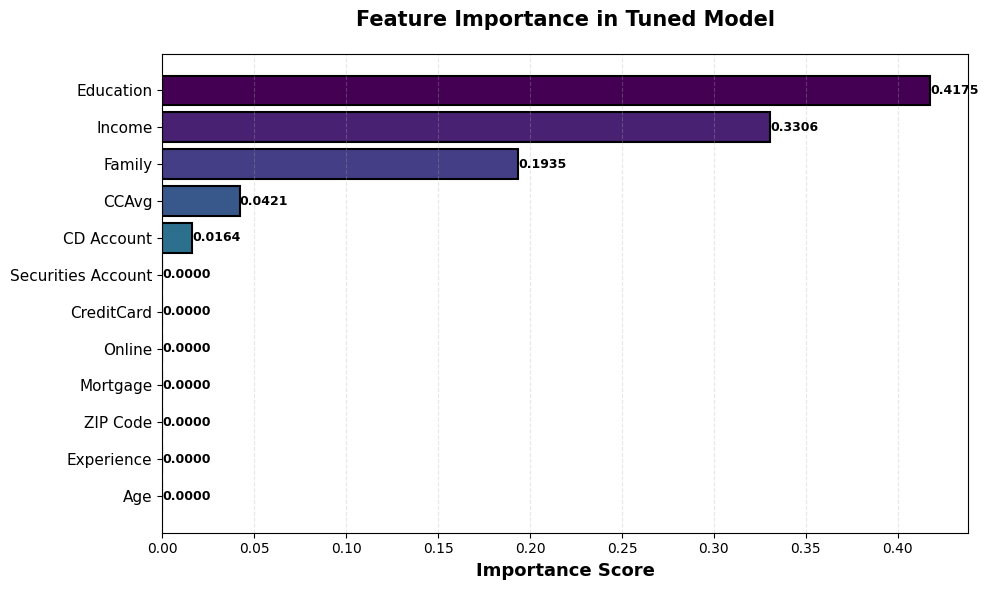

Feature importance complete!
Top 3 most important features for loan prediction:
  1. Education: 0.4175
  2. Income: 0.3306
  3. Family: 0.1935


In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

feature_importance = best_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(feature_importance)[::-1]

# Create horizontal bar chart
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
bars = ax.barh(range(len(feature_names)), feature_importance[indices],
               color=colors, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels([feature_names[i] for i in indices], fontsize=11)
ax.set_xlabel('Importance Score', fontsize=13, fontweight='bold')
ax.set_title('Feature Importance in Tuned Model', fontsize=15, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, idx) in enumerate(zip(bars, indices)):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{feature_importance[idx]:.4f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance complete!")
print("Top 3 most important features for loan prediction:")
for i in range(min(3, len(indices))):
    print(f"  {i+1}. {feature_names[indices[i]]}: {feature_importance[indices[i]]:.4f}")